# proyecto final de curso de machine learning 


## preprocesamiento 

In [ ]:
!pip install tensorflow

In [ ]:
!pip install efficientnet


In [78]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from efficientnet.tfkeras import EfficientNetB0
from tensorflow.keras.applications import ResNet50
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB


### creacion del archivo.csv

In [37]:
def cargar_imagen(ruta):
    imagen = Image.open(ruta)
    # Realizar cualquier preprocesamiento necesario aquí
    # Por ejemplo, cambiar el tamaño, normalizar píxeles, etc.
    imagen = imagen.resize((150, 150))  # Ajusta el tamaño según sea necesario
    imagen = np.array(imagen)
    return imagen


# creamos los dataframe tanto de tuberculos como de cortes

In [61]:
carpeta_principal = r'C:\Users\Username\Desktop\UNSAAC\2023-2\machine learning\proyect final\TUBERCULOS' # aqui modificamo la carpeta de las imagenes
extensiones_validas = ['.jpg', '.png', '.jpeg']  # Ajusta según las extensiones de tus imágenes

datosTuberculos = []

for etiqueta in os.listdir(carpeta_principal):
    carpeta_etiqueta = os.path.join(carpeta_principal, etiqueta)
    
    if os.path.isdir(carpeta_etiqueta):
        for archivo in os.listdir(carpeta_etiqueta):
            if archivo.lower().endswith(tuple(extensiones_validas)):
                ruta_completa = os.path.join(carpeta_etiqueta, archivo)
                imagen = cargar_imagen(ruta_completa)
                datosTuberculos.append({'ruta': ruta_completa, 'imagen': imagen, 'etiqueta': etiqueta})

# Crear DataFrame
df_Tuberculos = pd.DataFrame(datosTuberculos)

label_encoder = LabelEncoder()
df_Tuberculos['etiqueta_encoded'] = label_encoder.fit_transform(df_Tuberculos['etiqueta'])
# Guardar en CSV
df_Tuberculos.to_csv('tuberculos_train.csv', index=False)


## verificamos la correcta codificacion

In [39]:

num_etiquetas2 = df_Tuberculos['etiqueta'].nunique()
print(f'Número de etiquetas únicas en tuberculos: {num_etiquetas2}')



Número de etiquetas únicas en tuberculos: 15


# Empezamos con la implementacion de los modelos


In [40]:
X = np.array([np.array(im) for im in df_Tuberculos['imagen']]) / 255.0
y = df_Tuberculos['etiqueta_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# MODELOS

In [62]:
# Regresión Logística
lr_model = LogisticRegression(max_iter=100)
lr_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
lr_pred = lr_model.predict(X_test.reshape(-1, 150 * 150 * 3))

C:\Users\Username\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# Árbol de Decisión
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
dtree_pred = dtree_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [81]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
nb_pred = nb_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [95]:
# Decision Tree
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=50, random_state=42)
dt_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
dt_pred = dt_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [71]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train.reshape(-1, 150 * 150 * 3), y_train)
knn_pred = knn_model.predict(X_test.reshape(-1, 150 * 150 * 3))

In [120]:
# Perceptron (MLP)
mlp_model = models.Sequential()
mlp_model.add(layers.Flatten(input_shape=(150, 150, 3)))

mlp_model.add(layers.Dense(128, activation='relu'))
mlp_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train, y_train, epochs=10, validation_split=0.2)
mlp_pred = np.argmax(mlp_model.predict(X_test), axis=1)

Epoch 1/10
12/12 [==============================] - 2s 89ms/step - loss: 34.5828 - accuracy: 0.0941 - val_loss: 19.3779 - val_accuracy: 0.1398
Epoch 2/10
12/12 [==============================] - 1s 71ms/step - loss: 10.1067 - accuracy: 0.2796 - val_loss: 3.7646 - val_accuracy: 0.3656
Epoch 3/10
12/12 [==============================] - 1s 70ms/step - loss: 2.6105 - accuracy: 0.4758 - val_loss: 1.9428 - val_accuracy: 0.6129
Epoch 4/10
12/12 [==============================] - 1s 70ms/step - loss: 1.2146 - accuracy: 0.6425 - val_loss: 1.1878 - val_accuracy: 0.6667
Epoch 5/10
12/12 [==============================] - 1s 76ms/step - loss: 0.8963 - accuracy: 0.7124 - val_loss: 0.8187 - val_accuracy: 0.7634
Epoch 6/10
12/12 [==============================] - 1s 70ms/step - loss: 0.7115 - accuracy: 0.7849 - val_loss: 1.0469 - val_accuracy: 0.6559
Epoch 7/10
12/12 [==============================] - 1s 79ms/step - loss: 0.4971 - accuracy: 0.8737 - val_loss: 0.5744 - val_accuracy: 0.8710
Epoch 8/10

In [114]:
# Red Convolucional
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2)
cnn_pred = np.argmax(cnn_model.predict(X_test), axis=1)

Epoch 1/20
12/12 [==============================] - 4s 304ms/step - loss: 3.3020 - accuracy: 0.1183 - val_loss: 2.3927 - val_accuracy: 0.2903
Epoch 2/20
12/12 [==============================] - 3s 277ms/step - loss: 1.6142 - accuracy: 0.5806 - val_loss: 0.8686 - val_accuracy: 0.8387
Epoch 3/20
12/12 [==============================] - 4s 307ms/step - loss: 0.4645 - accuracy: 0.8522 - val_loss: 0.5632 - val_accuracy: 0.8495
Epoch 4/20
12/12 [==============================] - 4s 308ms/step - loss: 0.2159 - accuracy: 0.9328 - val_loss: 0.4346 - val_accuracy: 0.8925
Epoch 5/20
12/12 [==============================] - 6s 523ms/step - loss: 0.0767 - accuracy: 0.9812 - val_loss: 0.7958 - val_accuracy: 0.9032
Epoch 6/20
12/12 [==============================] - 6s 494ms/step - loss: 0.0243 - accuracy: 0.9946 - val_loss: 0.5199 - val_accuracy: 0.9462
Epoch 7/20
12/12 [==============================] - 6s 506ms/step - loss: 0.0683 - accuracy: 0.9785 - val_loss: 0.3518 - val_accuracy: 0.9570
Epoch 

In [116]:
# Red Preentrenada ResNet50
resnet_model = models.Sequential()
resnet_model.add(layers.Conv2D(3, (1, 1), input_shape=(150, 150, 3), activation='relu'))
resnet_model.add(ResNet50(weights='imagenet', include_top=False, pooling='avg'))
resnet_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
resnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
resnet_model.fit(X_train, y_train, epochs=10, validation_split=0.2)
resnet_pred = np.argmax(resnet_model.predict(X_test), axis=1)

Epoch 1/10
12/12 [==============================] - 69s 4s/step - loss: 0.8977 - accuracy: 0.7876 - val_loss: 55.1056 - val_accuracy: 0.0860
Epoch 2/10
12/12 [==============================] - 43s 4s/step - loss: 0.4206 - accuracy: 0.9059 - val_loss: 882.0788 - val_accuracy: 0.0753
Epoch 3/10
12/12 [==============================] - 46s 4s/step - loss: 0.4921 - accuracy: 0.9274 - val_loss: 5423.8252 - val_accuracy: 0.0323
Epoch 4/10
12/12 [==============================] - 47s 4s/step - loss: 0.5100 - accuracy: 0.9220 - val_loss: 5181.1675 - val_accuracy: 0.0860
Epoch 5/10
12/12 [==============================] - 45s 4s/step - loss: 0.1068 - accuracy: 0.9677 - val_loss: 994.0000 - val_accuracy: 0.0323
Epoch 6/10
12/12 [==============================] - 45s 4s/step - loss: 0.1654 - accuracy: 0.9570 - val_loss: 425.9213 - val_accuracy: 0.0323
Epoch 7/10
12/12 [==============================] - 45s 4s/step - loss: 0.3474 - accuracy: 0.9301 - val_loss: 16916.7754 - val_accuracy: 0.0753
Epo

In [46]:
# Red Preentrenada EfficientNet
effnet_model = models.Sequential()
effnet_model.add(layers.Conv2D(3, (1, 1), input_shape=(150, 150, 3), activation='relu'))
effnet_model.add(EfficientNetB0(weights='imagenet', include_top=False, pooling='avg'))
effnet_model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))
effnet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
effnet_model.fit(X_train, y_train, epochs=10, validation_split=0.2)
effnet_pred = np.argmax(effnet_model.predict(X_test), axis=1)

Epoch 1/10
12/12 [==============================] - 30s 1s/step - loss: 1.0152 - accuracy: 0.7849 - val_loss: 3.4530 - val_accuracy: 0.0860
Epoch 2/10
12/12 [==============================] - 12s 966ms/step - loss: 0.0370 - accuracy: 0.9919 - val_loss: 4.8337 - val_accuracy: 0.0860
Epoch 3/10
12/12 [==============================] - 13s 1s/step - loss: 0.0096 - accuracy: 1.0000 - val_loss: 5.3478 - val_accuracy: 0.0645
Epoch 4/10
12/12 [==============================] - 12s 959ms/step - loss: 0.0100 - accuracy: 0.9973 - val_loss: 5.5375 - val_accuracy: 0.0323
Epoch 5/10
12/12 [==============================] - 12s 981ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 5.0674 - val_accuracy: 0.0860
Epoch 6/10
12/12 [==============================] - 12s 971ms/step - loss: 0.0128 - accuracy: 0.9973 - val_loss: 4.3930 - val_accuracy: 0.0860
Epoch 7/10
12/12 [==============================] - 12s 975ms/step - loss: 0.0090 - accuracy: 0.9973 - val_loss: 3.0722 - val_accuracy: 0.1075
Epoch

# VALIDACION 

In [122]:
def evaluar_modelo(y_true, y_pred, modelo_nombre):
    accuracy = accuracy_score(y_true, y_pred)
    matriz_confusion = confusion_matrix(y_true, y_pred)
    print(f'Modelo: {modelo_nombre}')
    print(f'Accuracy: {accuracy}')

    matriz_confusion = confusion_matrix(y_true, y_pred)
    print(f'Modelo: {modelo_nombre}')
    print(f'Accuracy: {accuracy}')
    print('Matriz de Confusión:')
    print(matriz_confusion)
    # Crear una representación visual de la matriz de confusión
    plt.figure(figsize=(8, 6))
    sns.heatmap(matriz_confusion, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=range(15), yticklabels=range(15))
    plt.xlabel('Predicciones')
    plt.ylabel('Valores reales')
    plt.title(f'Matriz de Confusión de tuberculos- {modelo_nombre}')
    plt.show()


Modelo: Naive Bayes
Accuracy: 0.8461538461538461
Modelo: Naive Bayes
Accuracy: 0.8461538461538461
Matriz de Confusión:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 6 0 0 1 3 0 0 0 0 0 0 1 0 0]
 [0 0 3 0 0 0 0 0 0 0 0 0 1 0 1]
 [0 0 0 8 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 3 0 0 0 0 1 0 1 0 0]
 [0 0 0 0 0 0 8 0 0 0 0 0 2 0 0]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 6 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 8 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 7 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 7 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 8]]


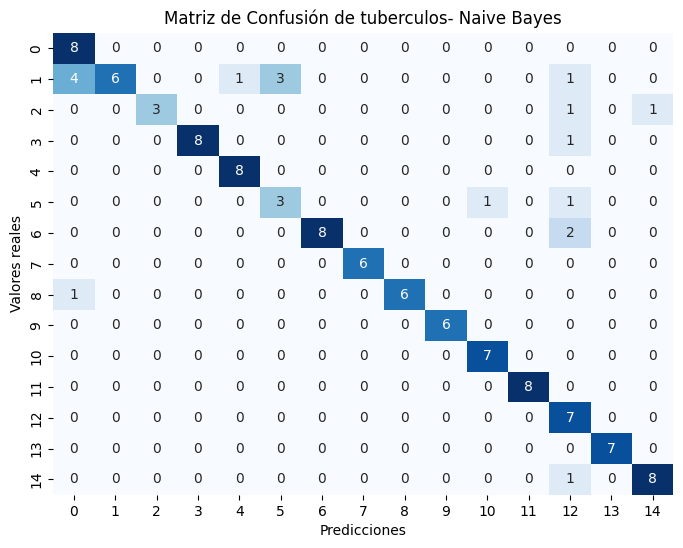

Modelo: Decision Tree
Accuracy: 0.8290598290598291
Modelo: Decision Tree
Accuracy: 0.8290598290598291
Matriz de Confusión:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 9 0 0 2 0 2 0 0 0 0 0 0 0 0]
 [1 0 4 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 7 0 1 0 0 0 0 0 0 0 0 1]
 [0 0 0 0 8 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 4 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 9 0 0 0 0 0 0 0 1]
 [0 0 0 0 0 0 0 6 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 7 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 7 0 0 0 0]
 [0 1 0 1 0 0 0 0 0 0 0 6 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 1 4 1 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 5 0]
 [0 0 0 0 0 0 2 0 0 0 0 0 0 0 7]]


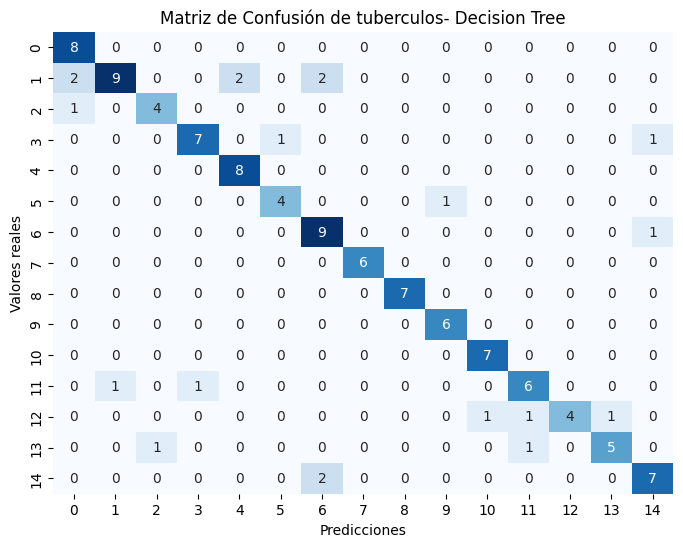

Modelo: K Vecinos Más Cercanos (KNN)
Accuracy: 0.9401709401709402
Modelo: K Vecinos Más Cercanos (KNN)
Accuracy: 0.9401709401709402
Matriz de Confusión:
[[ 7  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0 12  0  2  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  9  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  0  0  6  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


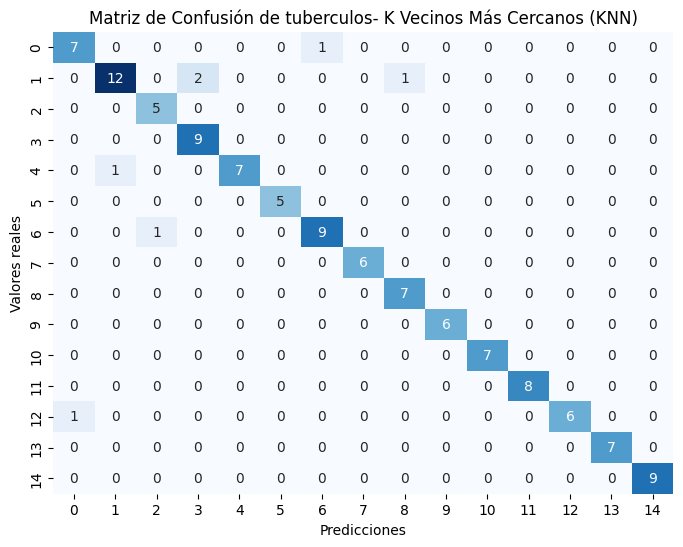

Modelo: Perceptron (MLP)
Accuracy: 0.9316239316239316
Modelo: Perceptron (MLP)
Accuracy: 0.9316239316239316
Matriz de Confusión:
[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  9  0  0  0  0  0  0  0  0  0  0  2  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 10  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


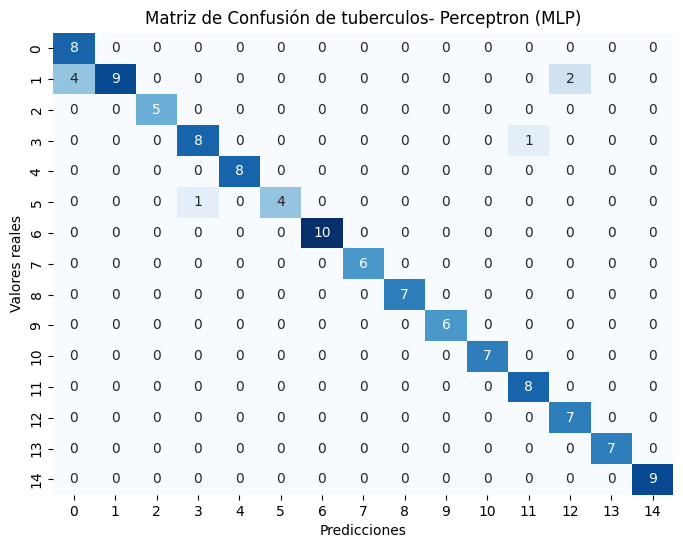

Modelo: Red Convolucional
Accuracy: 0.9572649572649573
Modelo: Red Convolucional
Accuracy: 0.9572649572649573
Matriz de Confusión:
[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 11  0  2  0  0  0  0  1  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


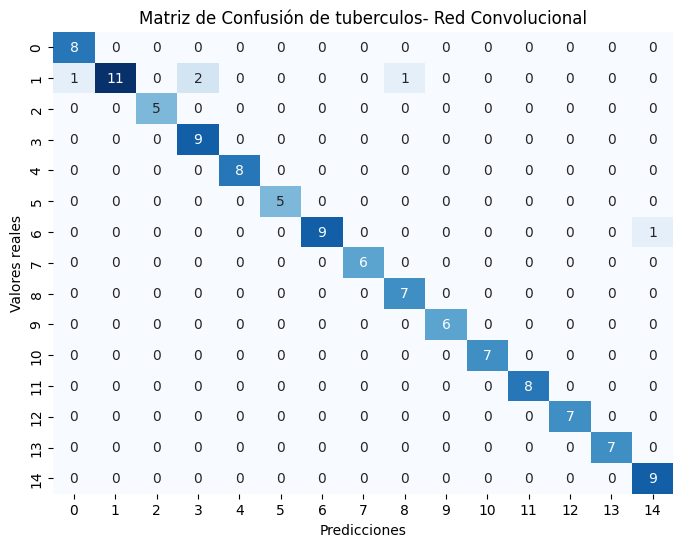

Modelo: Red Preentrenada ResNet50
Accuracy: 0.07692307692307693
Modelo: Red Preentrenada ResNet50
Accuracy: 0.07692307692307693
Matriz de Confusión:
[[ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 15  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  5  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 10  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]]


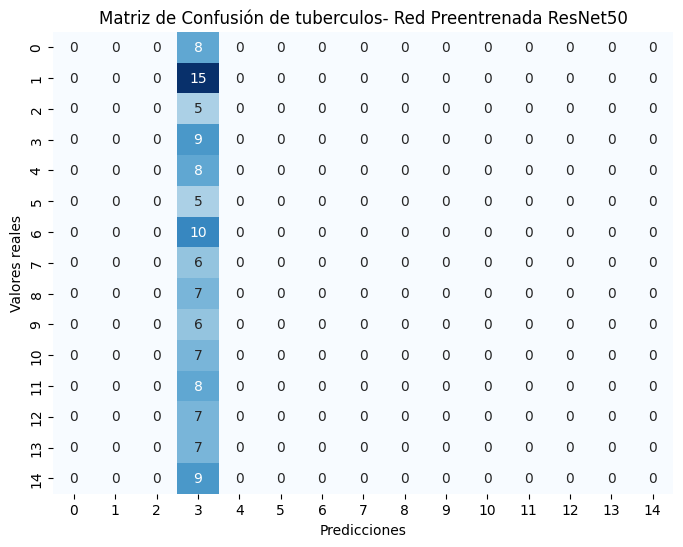

Modelo: Red Preentrenada EfficientNet
Accuracy: 0.1111111111111111
Modelo: Red Preentrenada EfficientNet
Accuracy: 0.1111111111111111
Matriz de Confusión:
[[8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [9 0 0 6 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [9 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 4 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [5 0 0 0 0 0 5 0 0 0 0 0 0 0 0]
 [3 0 0 3 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 4 0 0 0 0 0 1 0 0 0 0 0]
 [5 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [4 0 0 0 0 0 3 0 0 0 0 0 0 0 0]
 [8 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [3 0 0 0 0 0 2 0 0 1 1 0 0 0 0]
 [1 0 0 0 0 0 2 0 0 4 0 0 0 0 0]
 [2 0 0 1 0 0 5 0 0 0 1 0 0 0 0]]


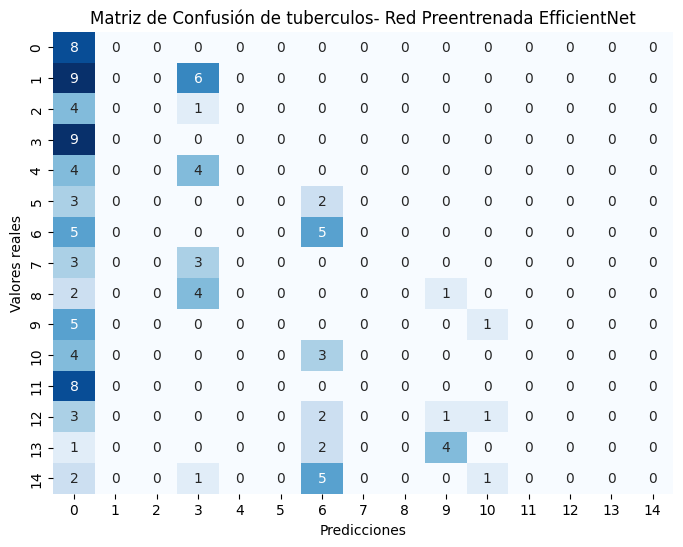

Modelo: Regresión Logística
Accuracy: 0.9572649572649573
Modelo: Regresión Logística
Accuracy: 0.9572649572649573
Matriz de Confusión:
[[ 8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 4 11  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  9  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  1]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  8  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  7  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  7  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  9]]


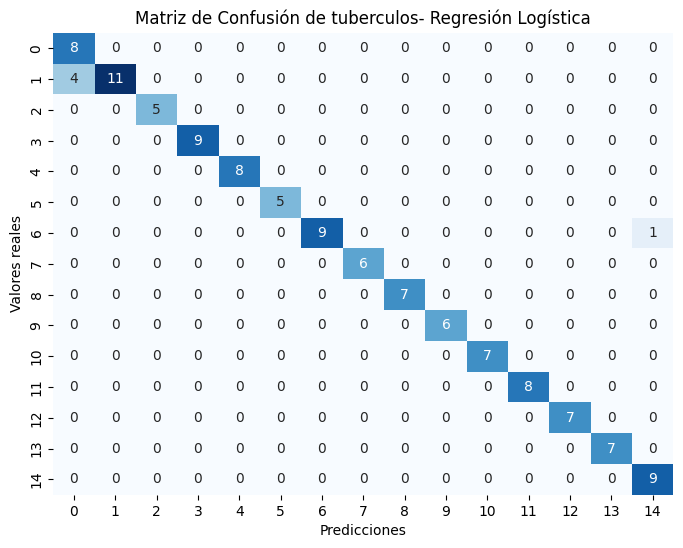

Modelo: Árbol de Decisión
Accuracy: 0.8205128205128205
Modelo: Árbol de Decisión
Accuracy: 0.8205128205128205
Matriz de Confusión:
[[ 7  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 11  0  0  0  1  0  1  1  0  0  1  0  0  0]
 [ 0  0  4  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  8  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  8  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  0  0  0  8  0  0  0  0  2  0  0  0]
 [ 0  0  0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  6  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  4  0  0  0  2]
 [ 0  0  0  0  0  1  0  0  0  0  0  7  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  5  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  5  1]
 [ 0  0  0  0  0  0  0  0  0  0  3  0  0  0  6]]


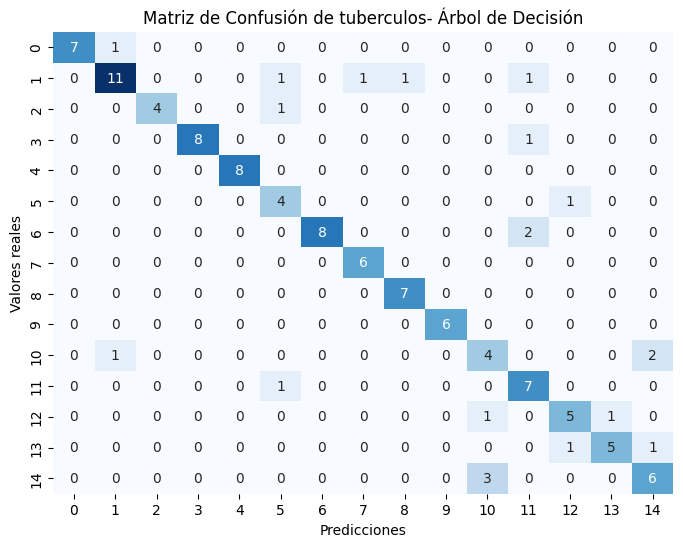

In [123]:
evaluar_modelo(y_test, nb_pred, 'Naive Bayes')
evaluar_modelo(y_test, dt_pred, 'Decision Tree')
evaluar_modelo(y_test, knn_pred, 'K Vecinos Más Cercanos (KNN)')
evaluar_modelo(y_test, mlp_pred, 'Perceptron (MLP)')
evaluar_modelo(y_test, cnn_pred, 'Red Convolucional')
evaluar_modelo(y_test, resnet_pred, 'Red Preentrenada ResNet50')
evaluar_modelo(y_test, effnet_pred, 'Red Preentrenada EfficientNet')
evaluar_modelo(y_test, lr_pred, 'Regresión Logística')
evaluar_modelo(y_test, dtree_pred, 'Árbol de Decisión')
